### Load Cleaned Dataset

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test = pd.read_csv("../data/cleaned/test.csv")
control = pd.read_csv("../data/cleaned/control.csv")
demo = pd.read_csv("../data/cleaned/demo.csv")
exp = pd.read_csv("../data/cleaned/exp.csv")

### Client Behavior Analysis
1. Who are the primary clients using this online process?
2. Are the primary clients younger or older, new or long-standing?
3. Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.


In [174]:
demo_exp = pd.merge(demo, exp, on="client_id")

In [223]:
demo_exp.client_id.nunique()

70609

Text(0.5, 1.0, "Client's Age Distribution")

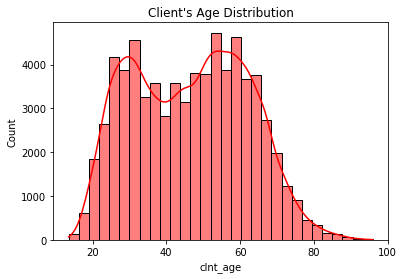

In [183]:
sns.histplot(demo['clnt_age'], kde=True, bins=30, color='red').set_title("Client's Age Distribution")

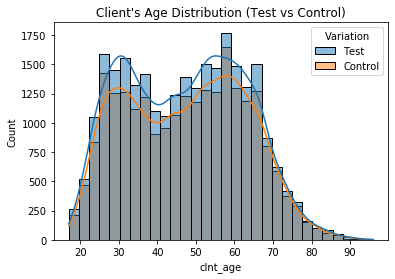

In [257]:
sns.histplot(data=demo_exp, x="clnt_age", hue="Variation", kde=True, bins=30, color='red').set_title("Client's Age Distribution (Test vs Control)");

Text(0.5, 1.0, "Client's Age Distribution (Control Group)")

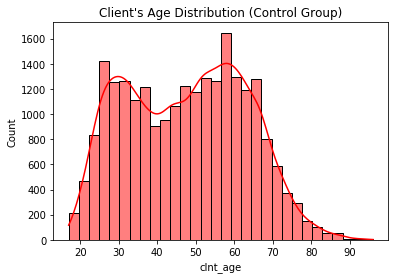

In [191]:
sns.histplot(demo_exp['clnt_age'][demo_exp["Variation"]=="Control"], kde=True, bins=30, color='red').set_title("Client's Age Distribution (Control Group)")

In [1]:
sns.histplot(demo_exp['clnt_age'][demo_exp["Variation"]=="Test"], kde=True, bins=30, color='red').set_title("Client's Age Distribution (Test Group)")

NameError: name 'sns' is not defined

Age distribution between Control & Test Group are relatively the same with the whole clients data in demo.

In [195]:
demo_exp.describe().round()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70609.0,70595.0,70595.0,70594.0,70595.0,70595.0,70595.0,70595.0
mean,5004992.0,12.0,151.0,46.0,2.0,147445.0,3.0,6.0
std,2877278.0,7.0,82.0,16.0,1.0,301509.0,2.0,2.0
min,169.0,2.0,33.0,14.0,1.0,13789.0,0.0,1.0
25%,2519329.0,6.0,82.0,32.0,2.0,37347.0,1.0,4.0
50%,5016978.0,11.0,136.0,47.0,2.0,63333.0,3.0,5.0
75%,7483085.0,16.0,192.0,59.0,2.0,137545.0,6.0,7.0
max,9999839.0,62.0,749.0,96.0,8.0,16320040.0,7.0,9.0


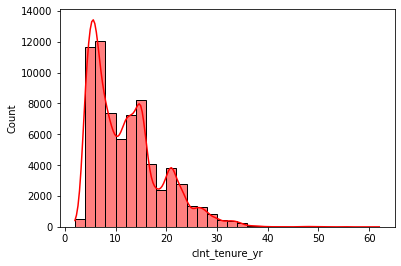

In [161]:
sns.histplot(demo['clnt_tenure_yr'], kde=True, bins=30, color='red')

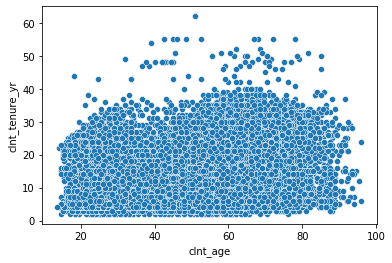

In [3]:
sns.scatterplot(demo, x='clnt_age', y='clnt_tenure_yr')

In [193]:
pd.crosstab(demo["calls_6_mnth"], demo["logons_6_mnth"])

logons_6_mnth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
calls_6_mnth,,,,,,,,,
0.0,0,0,7311,347,53,10,6,4,1
1.0,2938,134,27,7514,340,49,10,2,2
2.0,0,2875,149,10,6894,279,34,9,2
3.0,0,0,2756,128,10,5633,199,24,2
4.0,0,0,0,2221,100,4,4668,164,18
5.0,0,0,0,0,1857,60,3,4607,100
6.0,0,0,0,0,0,1843,44,0,12225
7.0,0,0,0,0,0,0,4929,0,0


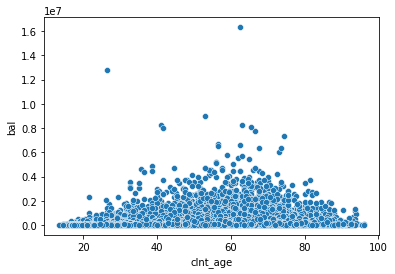

In [196]:
sns.scatterplot(demo, x='clnt_age', y='bal')

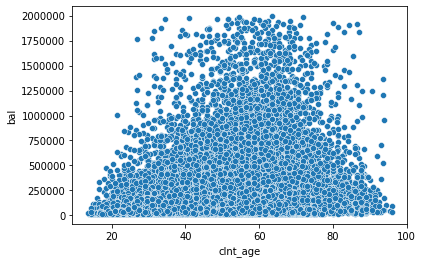

In [4]:
sns.scatterplot(demo[demo["bal"]<2000000], x='clnt_age', y='bal')

### Performace Metrics

1. Completion Rate: The proportion of users who reach the final ‘confirm’ step.
2. Time Spent on Each Step: The average duration users spend on each step.
3. Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

### 1. Completion Rate: The proportion of users who reach the final ‘confirm’ step.

Assumption:
- No matter from which visitor_id or visit_id, as long as the client_id follow the process_step sequentially (start > step 1 > step 2 > step 3 > confirm), the process is considered complete.

In [141]:
# Create privot dataframe (if the client_id has duplicate in 'visit_id' and 'process_step' -> keep the last)
test_pivot = test.drop_duplicates(subset=['client_id', 'visitor_id', 'visit_id','process_step'], keep='last')
test_pivot = test_pivot.pivot(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='date_time')
test_pivot = test_pivot.reset_index()
test_pivot = test_pivot[['client_id','visitor_id','visit_id','start','step_1','step_2','step_3','confirm']]

In [142]:
#Create dummy variable for each step (1=there is timestamp in particular step; 0=otherwise)
test_pivot['start_count'] = test_pivot[['start']].notna().sum(axis=1)
test_pivot['step_1_count'] = test_pivot[['step_1']].notna().sum(axis=1)
test_pivot['step_2_count'] = test_pivot[['step_2']].notna().sum(axis=1)
test_pivot['step_3_count'] = test_pivot[['step_3']].notna().sum(axis=1)
test_pivot['confirm_count'] = test_pivot[['confirm']].notna().sum(axis=1)

In [143]:
# Sum of count of log by each client_id (Note: some client_id may have >1 count in particular step)
test_count_log = test_pivot.groupby('client_id')[['start_count','step_1_count','step_2_count','step_3_count','confirm_count']].sum().reset_index()

In [ ]:
CR_test = test_count_log[['client_id', 'start_count', 'step_1_count', 'step_2_count','step_3_count', 'confirm_count']]

In [165]:
CR_test = 

process_step,client_id,start_count,step_1_count,step_2_count,step_3_count,confirm_count
0,555,1,1,1,1,1
1,647,1,1,1,1,1
2,934,1,0,0,0,0
3,1336,1,1,1,1,2
4,1346,1,1,1,1,0
...,...,...,...,...,...,...
26963,9999150,1,1,0,0,0
26964,9999400,1,1,1,1,1
26965,9999626,1,1,0,0,0
26966,9999729,3,3,2,1,1


In [94]:
CR = {"client_id": [] , "start": [], "step_1": [], "step_2": [], "step_3": [], "confirm": []}

In [97]:
test_pivot.tail(10)

process_step                                                                start  \
client_id visitor_id            visit_id                                            
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:05:58   
9998964   502193753_63097042630 448452610_76147168193_961371  2017-04-05 23:45:50   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:17:45   
9999150   665127594_52605538620 982803842_91891255980_123078  2017-05-29 16:55:30   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:21:28   
9999626   52633065_71189986073  182723364_27031318473_880901  2017-05-14 09:07:51   
9999729   604429154_69247391147 99583652_41711450505_426179   2017-04-05 13:40:49   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:08:25   
          843385170_36953471821 493310979_9209676464_421146   2017-04-20 14:28:57   
9999832   145538019_54444341400 472154369_16714624241_585315  2017-05-16 16:46:03   

process_step                                                               step_1  \
client_id visitor_id            visit_id                                            
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:06:05   
9998964   502193753_63097042630 448452610_76147168193_961371                  NaN   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:17:53   
9999150   665127594_52605538620 982803842_91891255980_123078  2017-05-29 16:55:18   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:21:50   
9999626   52633065_71189986073  182723364_27031318473_880901  2017-05-14 09:07:59   
9999729   604429154_69247391147 99583652_41711450505_426179   2017-04-05 13:41:04   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:08:30   
          843385170_36953471821 493310979_9209676464_421146   2017-04-20 14:22:49   
9999832   145538019_54444341400 472154369_16714624241_585315  2017-05-16 16:46:11   

process_step                                                               step_2  \
client_id visitor_id            visit_id                                            
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:06:31   
9998964   502193753_63097042630 448452610_76147168193_961371                  NaN   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:18:19   
9999150   665127594_52605538620 982803842_91891255980_123078                  NaN   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:22:17   
9999626   52633065_71189986073  182723364_27031318473_880901                  NaN   
9999729   604429154_69247391147 99583652_41711450505_426179                   NaN   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:08:40   
          843385170_36953471821 493310979_9209676464_421146   2017-04-20 14:27:36   
9999832   145538019_54444341400 472154369_16714624241_585315                  NaN   

process_step                                                               step_3  \
client_id visitor_id            visit_id                                            
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:08:12   
9998964   502193753_63097042630 448452610_76147168193_961371                  NaN   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:18:38   
9999150   665127594_52605538620 982803842_91891255980_123078                  NaN   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:23:03   
9999626   52633065_71189986073  182723364_27031318473_880901                  NaN   
9999729   604429154_69247391147 99583652_41711450505_426179                   NaN   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:09:19   
          843385170_36953471821 493310979_9209676464_421146                   NaN   
99

In [77]:
type(test_pivot)

pandas.core.frame.DataFrame

In [76]:
test_pivot[0][0][0]

KeyError: 0

In [67]:
37204-15413

21791

In [36]:
test["dup"] = test.duplicated(subset=['client_id', 'visitor_id', 'visit_id','process_step','date_time'])

In [43]:
test[test["client_id"]==31597]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,dup
602,31597,810809574_85595370255,184586102_78834247258_726297,start,2017-04-05 20:32:33,Test,False
603,31597,810809574_85595370255,184586102_78834247258_726297,start,2017-04-05 20:33:10,Test,False
604,31597,810809574_85595370255,573653666_38574505841_953176,start,2017-04-04 20:13:19,Test,False
605,31597,810809574_85595370255,573653666_38574505841_953176,step_1,2017-04-04 20:13:44,Test,False
606,31597,810809574_85595370255,573653666_38574505841_953176,start,2017-04-04 20:14:11,Test,False
607,31597,810809574_85595370255,573653666_38574505841_953176,start,2017-04-04 20:14:40,Test,False
608,31597,810809574_85595370255,573653666_38574505841_953176,start,2017-04-04 20:15:15,Test,False
609,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,False
610,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
611,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True


In [42]:
test[test["dup"]==True].head(20)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,dup
610,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
611,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
612,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
613,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
614,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
615,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
616,31597,810809574_85595370255,600166727_58963640265_39538,start,2017-05-02 10:52:46,Test,True
618,31597,810809574_85595370255,600166727_58963640265_39538,step_1,2017-05-02 10:53:01,Test,True
619,31597,810809574_85595370255,600166727_58963640265_39538,step_1,2017-05-02 10:53:01,Test,True
620,31597,810809574_85595370255,600166727_58963640265_39538,step_1,2017-05-02 10:53:01,Test,True


In [ ]:
# Not dropping 

In [6]:
test_start = test[test["process_step"]=="start"].drop_duplicates(subset=['client_id','process_step'], keep='last')
test_confirm = test[test["process_step"]=="confirm"].drop_duplicates(subset=['client_id','process_step'], keep='last')
CR_test = test_confirm.shape[0]/test_start.shape[0]*100
round(CR_test,2)

70.04

In [7]:
control_start = control[control["process_step"]=="start"].drop_duplicates(subset=['client_id','process_step'], keep='last')
control_confirm = control[control["process_step"]=="confirm"].drop_duplicates(subset=['client_id','process_step'], keep='last')
CR_control = control_confirm.shape[0]/control_start.shape[0]*100
round(CR_control,2)

65.97

In [246]:
control[control["process_step"]=="start"].drop_duplicates(subset=['client_id','process_step'], keep='last').head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control
10,1104,194240915_18158000533,643221571_99977972121_69283,start,2017-06-20 22:31:33,Control
12,1186,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02,Control
15,1195,766842522_69992551638,393817425_39015278493_996341,start,2017-04-05 20:15:26,Control
20,1197,753759429_54481946928,71862471_21202285428_848395,start,2017-04-01 17:16:24,Control


### 2. Time Spent on Each Step: The average duration users spend on each step.

In [ ]:
CR = test.sort_values(by=['client_id', 'visitor_id','visit_id', 'date_time'], ascending=[True, True, True,True]).reset_index(drop=True)
CR = CR.pivot(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='date_time')
CR = CR[['start','step_1','step_2','step_3','confirm']]

In [201]:
CR = CR.pivot(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='date_time')
CR = CR[['start','step_1','step_2','step_3','confirm']]

In [208]:
test.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test


In [207]:
CR.columns

Index(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype='object', name='process_step')

In [ ]:
# Create cleaned dataframe which only contains client who 

In [16]:
# Create dataframe to calculate Completion Rate
test_pivot = test.sort_values(by=['client_id', 'visitor_id','visit_id', 'date_time'], ascending=[True, True, True,True]).reset_index(drop=True)
test_cr = test_cr.drop_duplicates(subset=['client_id', 'visitor_id', 'visit_id','process_step',], keep='last')
CR = test_cr.pivot(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='date_time')

In [22]:
CR[['start','step_1','step_2','step_3','confirm']].tail(20)

process_step                                                                start  \
client_id visitor_id            visit_id                                            
9994115   434880129_22821511966 624274125_75872154112_718569  2017-04-19 11:48:36   
                                735990218_4756103072_34606    2017-04-05 15:43:22   
                                950367341_92559977720_135437  2017-05-08 10:33:25   
9994633   288644549_86006669162 278477876_89906801725_644188  2017-05-08 08:28:58   
9994764   208048562_5591648325  945115982_5995160722_563889   2017-04-24 12:28:11   
9995295   719082482_48238561745 944432037_72425410366_517931  2017-03-29 11:18:52   
9996901   310792418_31729904387 430471414_42674547657_971677  2017-04-19 16:12:46   
9998156   255983388_34400418109 254203981_1117450921_444839   2017-04-02 23:42:30   
9998773   481169437_1308863478  980310183_14300639078_417437  2017-04-12 23:45:27   
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:05:58   
9998964   502193753_63097042630 448452610_76147168193_961371  2017-04-05 23:45:50   
                                699981922_52880598802_858635                  NaN   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:17:45   
9999150   665127594_52605538620 982803842_91891255980_123078  2017-05-29 16:55:30   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:21:28   
9999626   52633065_71189986073  182723364_27031318473_880901  2017-05-14 09:07:51   
9999729   604429154_69247391147 99583652_41711450505_426179   2017-04-05 13:40:49   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:08:25   
          843385170_36953471821 493310979_9209676464_421146   2017-04-20 14:28:57   
9999832   145538019_54444341400 472154369_16714624241_585315  2017-05-16 16:46:03   

process_step                                                               step_1  \
client_id visitor_id            visit_id                                            
9994115   434880129_22821511966 624274125_75872154112_718569  2017-04-19 11:49:59   
                                735990218_4756103072_34606    2017-04-05 15:38:48   
                                950367341_92559977720_135437  2017-05-08 10:35:56   
9994633   288644549_86006669162 278477876_89906801725_644188                  NaN   
9994764   208048562_5591648325  945115982_5995160722_563889   2017-04-24 12:28:14   
9995295   719082482_48238561745 944432037_72425410366_517931  2017-03-29 11:18:50   
9996901   310792418_31729904387 430471414_42674547657_971677  2017-04-19 16:13:08   
9998156   255983388_34400418109 254203981_1117450921_444839   2017-04-02 23:42:34   
9998773   481169437_1308863478  980310183_14300639078_417437  2017-04-12 23:45:38   
9998851   660529049_81285947655 310744937_17135608286_213964  2017-04-05 12:06:05   
9998964   502193753_63097042630 448452610_76147168193_961371                  NaN   
                                699981922_52880598802_858635  2017-04-05 23:46:45   
9999009   212849256_28644888524 149965839_24823291142_245569  2017-03-31 07:17:53   
9999150   665127594_52605538620 982803842_91891255980_123078  2017-05-29 16:55:18   
9999400   915967319_19082377501 288904166_90826265353_276104  2017-04-20 05:21:50   
9999626   52633065_71189986073  182723364_27031318473_880901  2017-05-14 09:07:59   
9999729   604429154_69247391147 99583652_41711450505_426179   2017-04-05 13:41:04   
          834634258_21862004160 870243567_56915814033_814203  2017-05-08 16:08:30   
          843385170_36953471821 493310979_9209676464_421146   2017-04-20 14:22:49   
9999832   145538019_54444341400 472154369_16714624241_585315  2017-05-16 16:46:11   

process_step                                                               step_2  \
client_id visitor_id            visit_id                                            
9994115   434880129_22821511966 624274125_75872154112_718569  2017-04-19 11:50:04   
   